In [1]:
import sklearn
import mglearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline 
#import
import pandas as pd
import numpy as np
plt.rcParams['figure.figsize'] = (16, 9)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

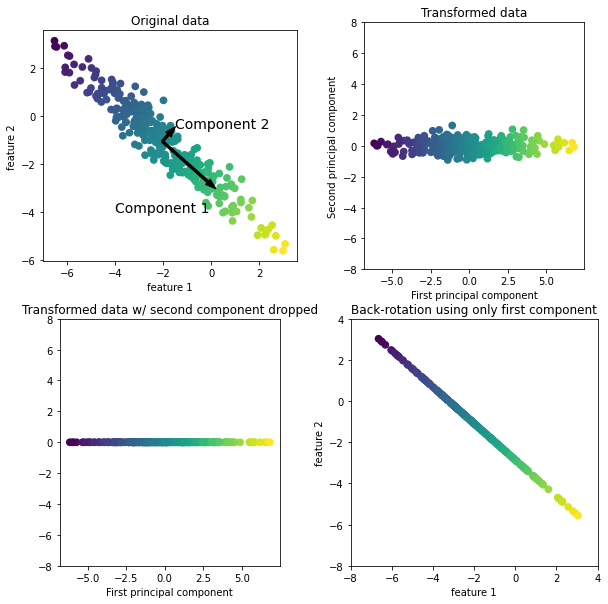

In [2]:
mglearn.plots.plot_pca_illustration()

In [4]:
dataframe = pd.read_csv("13_septiembre_dataset/dataset_final_pca.csv")
dataframe = dataframe.drop(['CLASIFICACION_FINAL','TIPO_PACIENTE'], axis=1)
dataframe.tail(10)

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,INTUBADO,NEUMONIA,EDAD,...,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI,DEFUNCION
110683,2,4,9,2,9,15,9,2,2,57,...,2,2,1,2,2,1,2,1,2,1
110684,2,5,24,2,24,24,20,2,2,47,...,2,2,2,2,2,2,2,2,2,1
110685,1,4,5,2,5,5,8,2,1,45,...,2,2,1,2,2,2,2,2,2,1
110686,2,12,31,2,31,31,100,1,1,52,...,2,2,2,2,2,2,2,2,2,0
110687,1,12,27,1,27,27,2,2,2,72,...,2,2,2,2,2,2,2,2,2,0
110688,1,4,19,2,27,19,18,2,1,60,...,2,2,2,2,2,2,2,1,2,0
110689,2,8,20,2,20,20,79,2,1,62,...,2,2,1,2,2,1,2,2,1,1
110690,2,12,24,1,24,24,35,2,1,42,...,2,2,2,2,2,2,2,2,2,0
110691,2,12,30,1,30,30,44,2,1,46,...,2,2,2,2,2,2,2,2,2,1
110692,1,4,29,1,29,29,24,2,2,75,...,2,2,1,2,2,2,2,2,2,0


In [5]:
#dataframe=dataframe.drop(['ID_REGISTRO'], axis=1)
pca=PCA(n_components=2)
pca.fit(dataframe)

PCA(n_components=2)

In [6]:
transformada=pca.transform(dataframe)

In [7]:
print(dataframe.shape)
print(transformada.shape)

(110693, 23)
(110693, 2)


Text(0, 0.5, 'PCA 2')

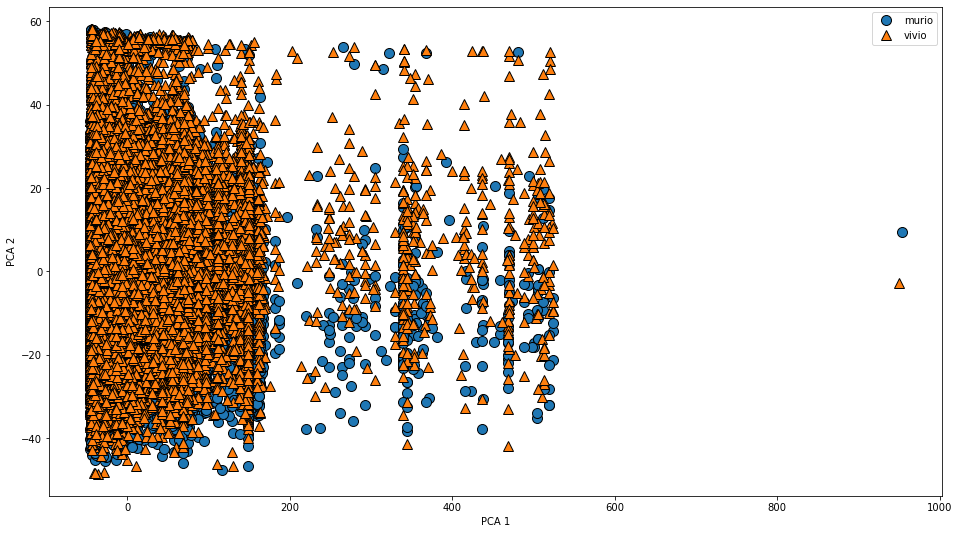

In [8]:
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], dataframe['DEFUNCION'])
plt.legend(['murio','vivio'],loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 2')

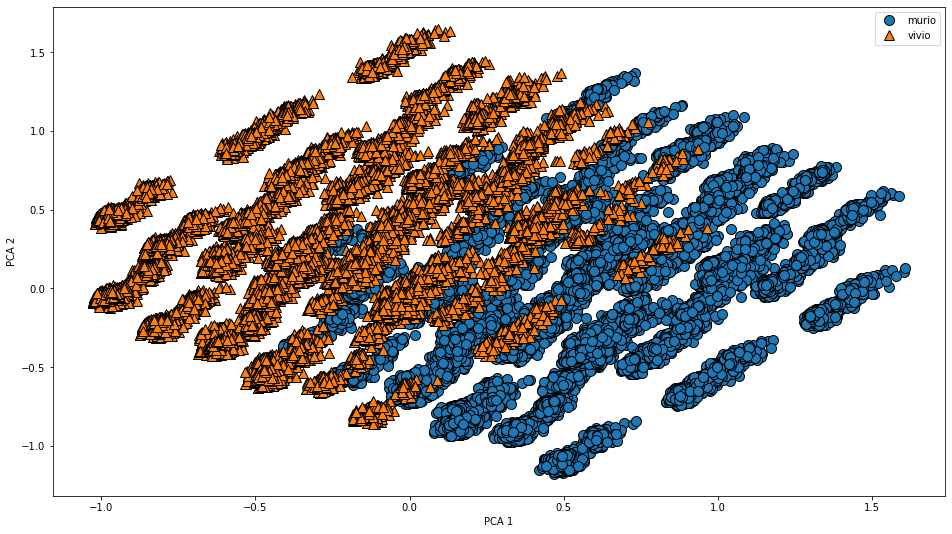

In [9]:

from sklearn.preprocessing import MinMaxScaler
escala=MinMaxScaler()
escala.fit(dataframe)
escalada=escala.transform(dataframe)
pca.fit(escalada)
transformada=pca.transform(escalada)
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], dataframe['DEFUNCION'])
plt.legend(['murio','vivio'],loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


In [10]:
escalada

array([[0.        , 0.91666667, 0.        , ..., 1.        , 0.01020408,
        1.        ],
       [1.        , 0.91666667, 0.22580645, ..., 1.        , 0.01020408,
        1.        ],
       [1.        , 1.        , 0.58064516, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.91666667, 0.74193548, ..., 1.        , 0.01020408,
        0.        ],
       [1.        , 0.91666667, 0.93548387, ..., 1.        , 0.01020408,
        1.        ],
       [0.        , 0.25      , 0.90322581, ..., 1.        , 0.01020408,
        0.        ]])

In [11]:
#MinMaxScaler o StandardScaler?